Consider our representation of permutations of students in a line from Exercise 1. (The teacher only swaps the positions of two students that are next to each other in line.) Let's consider a line of three students, Alice, Bob, and Carol (denoted A, B, and C). Using the Graph class created in the lecture, we can create a graph with the design chosen in Exercise 1: vertices represent permutations of the students in line; edges connect two permutations if one can be made into the other by swapping two adjacent students.

We construct our graph by first adding the following nodes:

In [1]:
from mylib import *
nodes = []
nodes.append(Node("ABC")) # nodes[0]
nodes.append(Node("ACB")) # nodes[1]
nodes.append(Node("BAC")) # nodes[2]
nodes.append(Node("BCA")) # nodes[3]
nodes.append(Node("CAB")) # nodes[4]
nodes.append(Node("CBA")) # nodes[5]

g = Graph()
for n in nodes:
    g.add_node(n)

#### Step 1: List all permutations (the nodes)

For three student (A, B, C), there are 6 possible permutations:

    ABC, ACB, BAC, BCA, CAB, CBA

These correspond to the nodes above node[0] through node[5]

#### Step 2: Define what an edge means

An edge exists **only** if you can reach one permutation from another by swapping two adjacent elements once. That means **exactly one swap**, not two.
For example:
* From **ABC**, swapping A an B gives **BAC** -> valid edge
* From **ABC**, swapping B an C gives **AVB** -> valid edge
* But **ABC -> BCA** takes two swaps (A<->B, then A<->C), so **no direct edge** - they're connected by a path, not an edge

#### Step 3: Check each permutation

For each node, perform the two adjacent swaps manually (positions 0-1 and 1-2):

| **Node** | **Swap positions** | **New permutation** | **Edge** |
|:--------:|:------------------:|:-------------------:|:--------:|
|   ABC    |        0-1         |         BAC         |  (0,2)   |
|   ABC    |        1-2         |         ACB         |  (0,1)   |
|   ACB    |        0-1         |         CAB         |  (1,4)   |
|   ACB    |        1-2         |         ABC         |  (1,0)   | duplicate (0,1)
|   BAC    |        0-1         |         ABC         |  (2,0)   | duplicate (0,2)
|   BAC    |        1-2         |         BCA         |  (2,3)   |
|   BCA    |        0-1         |         CBA         |  (3,5)   |
|   BCA    |        1-2         |         BAC         |  (3,2)   | duplicate (2,3)
|   CAB    |        0-1         |         ACB         |  (4,1)   | duplicate (1,4)
|   CAB    |        1-2         |         CBA         |  (4,5)   |
|   CBA    |        0-1         |         BCA         |  (5,3)   | duplicate (3,5)
|   CBA    |        1-2         |         CAB         |  (5,4)   | duplicate (4,5)

After removing the duplicates you end up with

    (0,2)   (0,1)   (1,4)   (2,3)   (3,5)   (4,5)


In [2]:
edges = [(0,2), (0,1), (1,4), (2,3), (3,5), (4,5)]
for i, j in edges:
    g.add_edge(Edge(nodes[i],nodes[j]))


In [3]:
print(g)

ABC -> BAC
ABC -> ACB
ACB -> ABC
ACB -> CAB
BAC -> ABC
BAC -> BCA
BCA -> BAC
BCA -> CBA
CAB -> ACB
CAB -> CBA
CBA -> BCA
CBA -> CAB


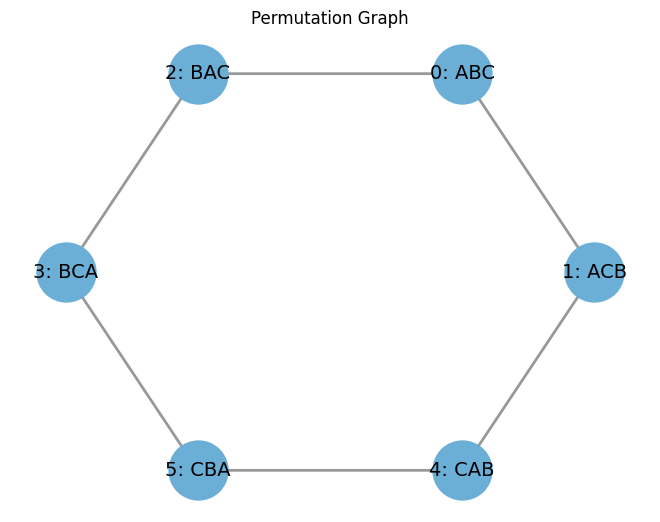

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# nodes is: [Node("ABC"), Node("ACB"), ..., Node("CBA")]
# edges is: [(0,2), (0,1), (1,4), (2,3), (3,5), (4,5)]

# 1. Get string labels from your Node objects
labels = [n.get_name() for n in nodes]   # ["ABC", "ACB", "BAC", "BCA", "CAB", "CBA"]

# 2. Convert index-based edges to label-based edges
nx_edges = [(labels[i], labels[j]) for (i, j) in edges]

# 3. Build the NetworkX graph with ONLY label nodes and edges
G = nx.Graph()
G.add_nodes_from(labels)
G.add_edges_from(nx_edges)

node_labels = {labels[i]: f"{i}: {labels[i]}" for i in range(len(labels))}


# 4. Choose a layout and draw
pos = nx.kamada_kawai_layout(G, scale=2, weight=None)
nx.draw(G, pos,
        with_labels=True,
        labels=node_labels,
        node_color="#6baed6",
        node_size=1800, font_size=14, width=2, edge_color="#999999")
plt.title("Permutation Graph")
plt.show()